In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score,confusion_matrix,roc_auc_score,
precision_score,recall_score,f1_score,classification_report,average_precision_score)

In [2]:
# Data Frame Location
df = pd.read_csv('C:\\Users\\E2\\Desktop\\Data Sets\\healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
sns.set()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Filling Missing Bmi Values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Replacing Categorical Values To Numerical Values
df['gender'] = df['gender'].replace({'Male':0, 'Female':1, 'Other':2}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace(
    {'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace(
    {'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3}).astype(np.uint8)

In [7]:
# Splitting The Data To Test And Train
X= df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'Residence_type', 'smoking_status']]
y= df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [8]:
X_test.head(10)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,Residence_type,smoking_status
4688,0,31.00,0,0,1,64.85,23.000000,0,1
4478,0,40.00,0,0,1,65.29,28.300000,0,0
3849,1,8.00,0,0,3,74.42,22.500000,1,1
4355,1,79.00,1,0,1,76.64,19.500000,0,0
3826,1,75.00,0,0,2,94.77,27.200000,0,0
3951,1,79.00,1,0,1,92.43,28.893237,0,0
3396,1,56.00,1,0,0,97.37,34.100000,0,3
465,0,69.00,0,0,0,101.52,26.800000,0,3
410,0,7.00,0,0,1,64.06,18.900000,0,1
1632,1,1.48,0,0,3,55.51,18.500000,0,1


In [9]:
# Before SMOTE, Number Of Stroke Case
number_of_ones = 0
number_of_zeros = 0
for i in y_train:
    if i == 1:
        number_of_ones += 1
    elif i == 0:
        number_of_zeros += 1
print(f'Number of storke case is: {number_of_ones}\n')
print(f'Number of no-stroke case is: {number_of_zeros}')

Number of storke case is: 76

Number of no-stroke case is: 1457


Text(0.5, 1.0, 'Before Over')

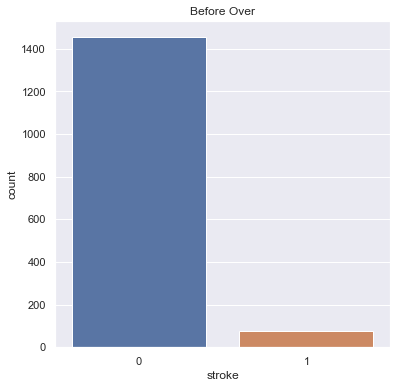

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(y_train)
plt.title('Before Over')

In [11]:
# SMOTE The Data
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [12]:
# After SMOTE, Number Of Stroke Case
number_of_ones = 0
number_of_zeros = 0
for i in y_train_resh:
    if i == 1:
        number_of_ones += 1
    elif i == 0:
        number_of_zeros += 1
print(f'Number of storke case is: {number_of_ones}\n')
print(f'Number of no-stroke case is: {number_of_zeros}')

Number of storke case is: 1457

Number of no-stroke case is: 1457


Text(0.5, 1.0, 'After SMOTE')

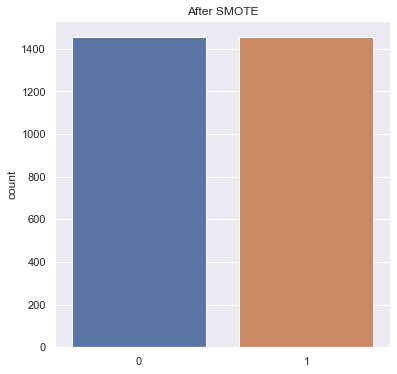

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(y_train_resh)
plt.title('After SMOTE')

In [14]:
# Models With Default Parameters

In [15]:
# Logistic Regression
logmodel = LogisticRegression(max_iter=3000)
logmodel.fit(X_train_resh, y_train_resh)
logmodel_predict = logmodel.predict(X_test)
print(confusion_matrix(y_test, logmodel_predict))
print('\n')
print(classification_report(y_test, logmodel_predict))

[[2653  751]
 [  70  103]]


              precision    recall  f1-score   support

           0       0.97      0.78      0.87      3404
           1       0.12      0.60      0.20       173

    accuracy                           0.77      3577
   macro avg       0.55      0.69      0.53      3577
weighted avg       0.93      0.77      0.83      3577



<AxesSubplot:>

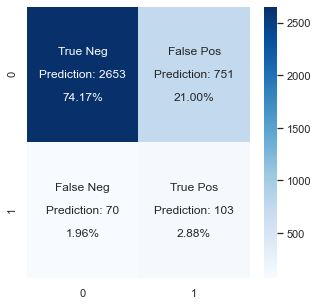

In [16]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, logmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
# Support Vector Machine
svcmodel = SVC()
svcmodel.fit(X_train_resh, y_train_resh)
svcmodel_predict = svcmodel.predict(X_test)
print(confusion_matrix(y_test, svcmodel_predict))
print('\n')
print(classification_report(y_test, svcmodel_predict))

[[2330 1074]
 [  31  142]]


              precision    recall  f1-score   support

           0       0.99      0.68      0.81      3404
           1       0.12      0.82      0.20       173

    accuracy                           0.69      3577
   macro avg       0.55      0.75      0.51      3577
weighted avg       0.94      0.69      0.78      3577



<AxesSubplot:>

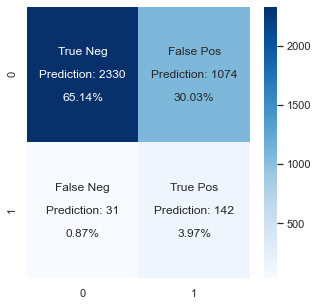

In [18]:
# Support Vector Machine Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, svcmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [19]:
# K Nearest Neighbor
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train_resh, y_train_resh)
knnmodel_predict = knnmodel.predict(X_test)
print(confusion_matrix(y_test, knnmodel_predict))
print('\n')
print(classification_report(y_test, knnmodel_predict))

[[2700  704]
 [  86   87]]


              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3404
           1       0.11      0.50      0.18       173

    accuracy                           0.78      3577
   macro avg       0.54      0.65      0.53      3577
weighted avg       0.93      0.78      0.84      3577



<AxesSubplot:>

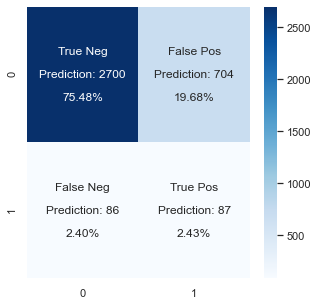

In [20]:
# K Nearst Neighbor Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, knnmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [21]:
# Gaussian Naive Bayes
gausmodel = GaussianNB()
gausmodel.fit(X_train_resh, y_train_resh)
gausmodel_predict = gausmodel.predict(X_test)
print(confusion_matrix(y_test, gausmodel_predict))
print('\n')
print(classification_report(y_test, gausmodel_predict))

[[2552  852]
 [  74   99]]


              precision    recall  f1-score   support

           0       0.97      0.75      0.85      3404
           1       0.10      0.57      0.18       173

    accuracy                           0.74      3577
   macro avg       0.54      0.66      0.51      3577
weighted avg       0.93      0.74      0.81      3577



<AxesSubplot:>

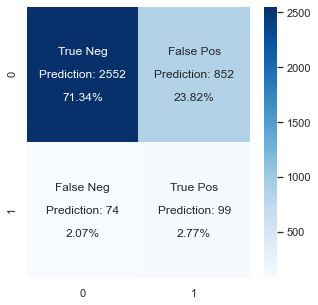

In [22]:
# Gaussian Naive Bayes Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, gausmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [23]:
# Decision Tree Classifier
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train_resh, y_train_resh)
dtreemodel_predict = dtreemodel.predict(X_test)
print(confusion_matrix(y_test, dtreemodel_predict))
print('\n')
print(classification_report(y_test, dtreemodel_predict))

[[3030  374]
 [ 135   38]]


              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3404
           1       0.09      0.22      0.13       173

    accuracy                           0.86      3577
   macro avg       0.52      0.55      0.53      3577
weighted avg       0.92      0.86      0.88      3577



<AxesSubplot:>

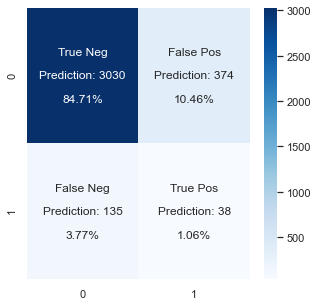

In [24]:
# Decision Tree Classifier Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, dtreemodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [25]:
# Random Forest Classifier
rfcmodel = RandomForestClassifier()
rfcmodel.fit(X_train_resh, y_train_resh)
rfcmodel_predict = rfcmodel.predict(X_test)
print(confusion_matrix(y_test, rfcmodel_predict))
print('\n')
print(classification_report(y_test, rfcmodel_predict))

[[3150  254]
 [ 142   31]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3404
           1       0.11      0.18      0.14       173

    accuracy                           0.89      3577
   macro avg       0.53      0.55      0.54      3577
weighted avg       0.92      0.89      0.90      3577



<AxesSubplot:>

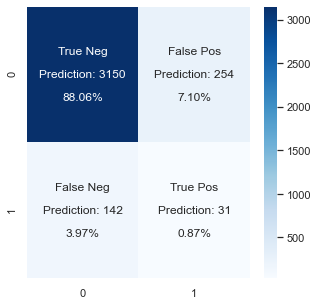

In [26]:
# Random Forest Classifier Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, rfcmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [27]:
# BernoulliNB
bermodel = BernoulliNB()
bermodel.fit(X_train_resh, y_train_resh)
bermodel_predict = bermodel.predict(X_test)
print(confusion_matrix(y_test, bermodel_predict))
print('\n')
print(classification_report(y_test, bermodel_predict))

[[2391 1013]
 [ 125   48]]


              precision    recall  f1-score   support

           0       0.95      0.70      0.81      3404
           1       0.05      0.28      0.08       173

    accuracy                           0.68      3577
   macro avg       0.50      0.49      0.44      3577
weighted avg       0.91      0.68      0.77      3577



<AxesSubplot:>

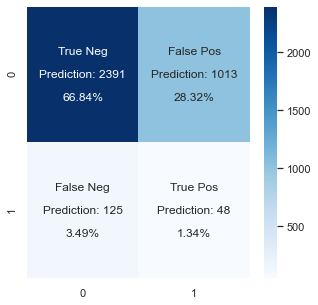

In [28]:
# BernoulliNB Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, bermodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [29]:
# XGB Classifier
xgbmodel = XGBClassifier(eval_metric='error', use_label_encoder=False)
xgbmodel.fit(X_train_resh, y_train_resh)
xgbmodel_predict = xgbmodel.predict(X_test)
print(confusion_matrix(y_test, xgbmodel_predict))
print('\n')
print(classification_report(y_test, xgbmodel_predict))

[[3201  203]
 [ 141   32]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3404
           1       0.14      0.18      0.16       173

    accuracy                           0.90      3577
   macro avg       0.55      0.56      0.55      3577
weighted avg       0.92      0.90      0.91      3577



C:\Users\E2\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<AxesSubplot:>

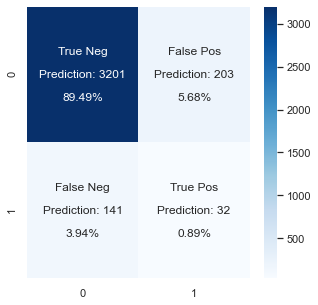

In [30]:
# XGB Classifier Confusion Matrix
plt.figure(figsize=(5,5))
c_matrix = confusion_matrix(y_test, xgbmodel_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f'{v1}\n\nPrediction: {v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [31]:
# -------------------------------------------------------

In [32]:
# Tuning The Models

In [68]:
# Logistic Regression With GRID
param_grid = {'C':[0.25, 0.5, 0.75, 1]}
logmodel_grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter=3000), param_grid)
logmodel_grid.fit(X_train_resh, y_train_resh)
print('Logistic Regression\n')
print(f'Best Accuracy: % {(logmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {logmodel_grid.best_params_}\n')

Logistic Regression

Best Accuracy: % 83.25

Best Parameters: {'C': 1}



In [70]:
# Support Vector Machine With GRID
param_grid = {'C':[0.25, 0.5, 0.75, 1],'kernel':['linear', 'rbf']}
svmmodel_grid = GridSearchCV(SVC(), param_grid)
svmmodel_grid.fit(X_train_resh, y_train_resh)
print('Support Vector Machine\n')
print(f'Best Accuracy: % {(svmmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {svmmodel_grid.best_params_}\n')

Support Vector Machine

Best Accuracy: % 83.36

Best Parameters: {'C': 1, 'kernel': 'linear'}



In [71]:
# K Nearst Neighbor With GRID
param_grid = {'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knnmodel_grid = GridSearchCV(KNeighborsClassifier(), param_grid)
knnmodel_grid.fit(X_train_resh, y_train_resh)
print('K Nearst Neighbor\n')
print(f'Best Accuracy: % {(knnmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {knnmodel_grid.best_params_}\n')

K Nearst Neighbor

Best Accuracy: % 89.02

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}



In [72]:
# Gaussian Naive Bayes With GRID
param_grid = {'var_smoothing': [1e-09]}
gnbmodel_grid = GridSearchCV(GaussianNB(), param_grid)
gnbmodel_grid.fit(X_train_resh, y_train_resh)
print('Gaussian Naive Bayes\n')
print(f'Best Accuracy: % {(gnbmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {gnbmodel_grid.best_params_}\n')

Gaussian Naive Bayes

Best Accuracy: % 84.66

Best Parameters: {'var_smoothing': 1e-09}



In [73]:
# Decision Tree Classifier With GRID
param_grid = {'criterion':['gini','entropy']}
dtreemodel_grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
dtreemodel_grid.fit(X_train_resh, y_train_resh)
print('Decision Tree Classifier\n')
print(f'Best Accuracy: % {(dtreemodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {dtreemodel_grid.best_params_}\n')

Decision Tree Classifier

Best Accuracy: % 90.98

Best Parameters: {'criterion': 'gini'}



In [74]:
# Random Forest Classifier With GRID
param_grid = {'n_estimators':[100,150,200],'criterion':['gini','entropy']}
rfcmodel_grid = GridSearchCV(RandomForestClassifier(), param_grid)
rfcmodel_grid.fit(X_train_resh, y_train_resh)
print('Random Forest Classifier\n')
print(f'Best Accuracy: % {(rfcmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {rfcmodel_grid.best_params_}\n')

Random Forest Classifier

Best Accuracy: % 93.72

Best Parameters: {'criterion': 'entropy', 'n_estimators': 100}



In [75]:
# BernoulliNB With GRID
param_grid = {'alpha': [0.25, 0.5, 1]}
bnbmodel_grid = GridSearchCV(BernoulliNB(), param_grid)
bnbmodel_grid.fit(X_train_resh, y_train_resh)
print('BernoulliNB\n')
print(f'Best Accuracy: % {(bnbmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {bnbmodel_grid.best_params_}\n')

BernoulliNB

Best Accuracy: % 67.09

Best Parameters: {'alpha': 0.25}



In [76]:
# XGB Classifier With GRID
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}
xgbmodel_grid = GridSearchCV(XGBClassifier(use_label_encoder=False), param_grid)
xgbmodel_grid.fit(X_train_resh, y_train_resh)
print('XGB Classifier\n')
print(f'Best Accuracy: % {(xgbmodel_grid.best_score_ * 100):.2f}\n')
print(f'Best Parameters: {xgbmodel_grid.best_params_}\n')

C:\Users\E2\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGB Classifier

Best Accuracy: % 93.24

Best Parameters: {'eval_metric': 'error', 'learning_rate': 0.1}



In [41]:
data = {'Algorithm':['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF', 'BNB', 'XGB'],
        'Accuracy':[accuracy_score(y_test, logmodel_predict) * 100, accuracy_score(y_test, svcmodel_predict) * 100,
                    accuracy_score(y_test, knnmodel_predict) * 100, accuracy_score(y_test, gausmodel_predict) * 100,
                    accuracy_score(y_test, dtreemodel_predict) * 100, accuracy_score(y_test, rfcmodel_predict) * 100,
                    accuracy_score(y_test, bermodel_predict) * 100, accuracy_score(y_test, xgbmodel_predict) * 100],
         'Precision':[precision_score(y_test, logmodel_predict), precision_score(y_test, svcmodel_predict),
                    precision_score(y_test, knnmodel_predict), precision_score(y_test, gausmodel_predict),
                    precision_score(y_test, dtreemodel_predict), precision_score(y_test, rfcmodel_predict),
                    precision_score(y_test, bermodel_predict), precision_score(y_test, xgbmodel_predict)],
         'Recall':[recall_score(y_test, logmodel_predict), recall_score(y_test, svcmodel_predict),
                    recall_score(y_test, knnmodel_predict), recall_score(y_test, gausmodel_predict),
                    recall_score(y_test, dtreemodel_predict), recall_score(y_test, rfcmodel_predict),
                    recall_score(y_test, bermodel_predict), recall_score(y_test, xgbmodel_predict)],
         'F-Score':[f1_score(y_test, logmodel_predict), f1_score(y_test, svcmodel_predict),
                    f1_score(y_test, knnmodel_predict), f1_score(y_test, gausmodel_predict),
                    f1_score(y_test, dtreemodel_predict), f1_score(y_test, rfcmodel_predict),
                    f1_score(y_test, bermodel_predict), f1_score(y_test, xgbmodel_predict)],
         'ROC Area':[roc_auc_score(y_test, logmodel_predict), roc_auc_score(y_test, svcmodel_predict),
                    roc_auc_score(y_test, knnmodel_predict), roc_auc_score(y_test, gausmodel_predict),
                    roc_auc_score(y_test, dtreemodel_predict), roc_auc_score(y_test, rfcmodel_predict),
                    roc_auc_score(y_test, bermodel_predict), roc_auc_score(y_test, xgbmodel_predict)]}
df_experiment = pd.DataFrame(data)

In [42]:
df_experiment.head(10)

,Algorithm,Accuracy,Precision,Recall,F-Score,ROC Area
0,LR,77.047805,0.120609,0.595376,0.200584,0.687376
1,SVM,69.108191,0.116776,0.820809,0.204464,0.752649
2,KNN,77.914453,0.109987,0.502890,0.180498,0.648037
3,GNB,74.112385,0.104101,0.572254,0.176157,0.660980
4,DT,85.770198,0.092233,0.219653,0.129915,0.554891
5,RF,88.929270,0.108772,0.179191,0.135371,0.552286
6,BNB,68.185630,0.045240,0.277457,0.077796,0.489933
7,XGB,90.383003,0.136170,0.184971,0.156863,0.562668


<AxesSubplot:title={'center':'Algorithm Accuracies With Default Parameters'}, xlabel='Accuracy', ylabel='Algorithm'>

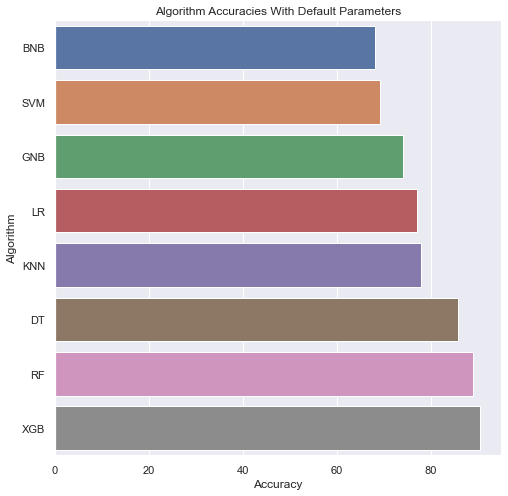

In [65]:
# Algorithm Accuracies With Default Parameters
df_experiment.sort_values(by='Accuracy', inplace=True)
plt.figure(figsize=(8,8))
plt.title('Algorithm Accuracies With Default Parameters')
sns.barplot(x='Accuracy', y='Algorithm', data=df_experiment)

In [61]:
# Algorithm Accuracies With Best Parameters
data2 = {'Algorithm':['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF', 'BNB', 'XGB'],
        'Accuracy':[(logmodel_grid.best_score_ * 100), (svmmodel_grid.best_score_ * 100),
                    (knnmodel_grid.best_score_ * 100), (gnbmodel_grid.best_score_ * 100),
                    (dtreemodel_grid.best_score_ * 100), (rfcmodel_grid.best_score_ * 100),
                    (bnbmodel_grid.best_score_ * 100), (xgbmodel_grid.best_score_ * 100)]
         }
df_experiment_Best_Values = pd.DataFrame(data2)

<AxesSubplot:title={'center':'Algorithm Accuracies With Best Parameters'}, xlabel='Accuracy', ylabel='Algorithm'>

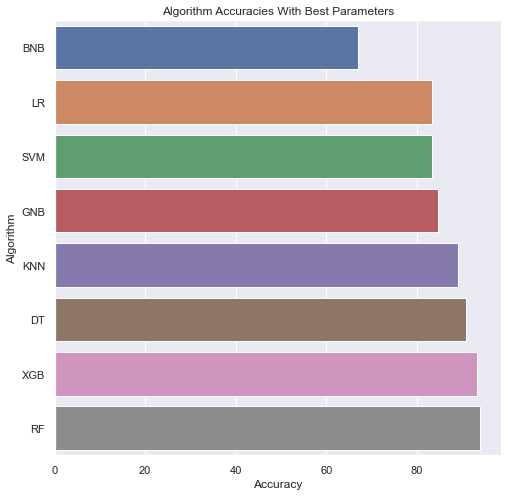

In [67]:
# Algorithm Accuracies With Best Parameters
df_experiment_Best_Values.sort_values(by='Accuracy', inplace=True)
plt.figure(figsize=(8,8))
plt.title('Algorithm Accuracies With Best Parameters')
sns.barplot(x='Accuracy', y='Algorithm', data=df_experiment_Best_Values)

In [64]:
df_experiment_Best_Values.head(10)

,Algorithm,Accuracy
6,BNB,67.090532
0,LR,83.253464
1,SVM,83.356262
3,GNB,84.660572
2,KNN,89.018762
4,DT,90.803699
7,XGB,93.239907
5,RF,93.926367
